Getting the imports I need


In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch import nn
!pip install d2l
%pip install matplotlib-inline
from d2l import torch as d2l

Unzipping my files so I can get the images in the code


In [ ]:
!unzip /content/Training\ and\ Validation\ Data_2023_T1_COMP3010.zip

In [ ]:
!unzip /content/Testing\ Data_2023.zip

In [ ]:
#the compose function applies transformations to each image in order
train_transforms = transforms.Compose([
    #randomly rotates image by 30 degrees(for data augmentation purposes)
    transforms.RandomRotation(30),
    #crops image to a square size of 224*224
    transforms.RandomResizedCrop(224),
    #flips image horizontally again for augmentation purposes
    transforms.RandomHorizontalFlip(),
    #converts image to pytorch tensor
    transforms.ToTensor(),
    #normalising pixel of image
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
#doing the same to validation and testing data too
val_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
test_transforms = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
#getting the data from the path and subdirectories
data_dir = '/content/Training and Validation Data_2023_T1_COMP3010 (2)/Training and Validation Data_2023_T1_COMP3010/Data/coral image classification'
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
val_data = datasets.ImageFolder(data_dir + '/val', transform=val_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)




In [ ]:
#number of samples processed in each batch
batch_size = 16
#shuffle is for shuffling data before creating batches
#the train_data,val_data and test_data are datasets
#data loaders iterate over these datasets in batch sizes
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:


#loading pre-trained resnet model from the torch library
mod = torchvision.models.resnet18(pretrained = True)
#this one is not pre-trained has randomised weights
rnd = torchvision.models.resnet50()
#replaces last fully connected layer with new layer that has same input features as old but new output features,new output
#features equal to number of classes in training data
mod.fc = nn.Linear(mod.fc.in_features, len(train_data.classes))

print(mod.fc.in_features)
print(len(train_data.classes))
rnd.fc = nn.Linear(rnd.fc.in_features, len(train_data.classes))
#checking if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
torch.cuda.is_available()

In [ ]:
#defining the loss function and optimiser
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mod.parameters(), lr=0.001, weight_decay=0.001, momentum=0.9)
## optimizer1 = torch.optim.SGD(rnd.parameters(), lr=0.001, momentum=0.9)

In [ ]:
!pip uninstall matplotlib
!pip install --upgrade matplotlib

In [ ]:
torch.cuda.is_available()

loss 0.056, train acc 0.387, test acc 0.525
339.3 examples/sec on [device(type='cuda', index=0)]


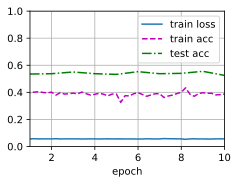

In [ ]:
# training the model with the library
num_epochs = 10
d2l.train_ch13(mod, trainloader, valloader, loss, optimizer, num_epochs)
#d2l.train_ch13(rnd, trainloader,valloader, loss, optimizer, num_epochs)


In [ ]:
# Evaluate the model on the testing data
test_accuracy = d2l.evaluate_accuracy_gpu(mod, testloader)
print('Testing accuracy:', test_accuracy)



Testing accuracy: 0.5225
